# Supervised learning, Linear models, and Loss functions



## Data set 

In this project, we'll be working with some data on possums.  It's a relatively small data set, but it's a good size to get you started with ordinary least squares (OLS) and least absolute deviation (LAD), and to gain experience with supervised learning in general.  You're going to write your own methods to fit both OLS and LAD models, and then at the end compare them to the models produced by the `statsmodels` package.

For this project, we will examine some data representing possums in Australia and New Guinea.
The code below loads in a pandas data frame with 46 observations on the following 6 variables:

sex: Sex, either m (male) or f (female).  
age: Age in years.  
headL: Head length, in mm.  
skullW: Skull width, in mm.  
totalL: Total length, in cm.  
tailL: Tail length, in cm.

## Task 1: OLS estimation and plotting


In [677]:
#It's dangerous to go alone.  Take these!
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Read in the data you will need for this assignment
possum_data=pd.read_csv('possum.csv')

### Question 1:

Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. Label your plot and your axes. You might want to add an `alpha` in case some data are overlapping.  Perform any other exploratory analysis you think might be useful (optional.)

Text(0.5, 1.0, 'A scatter plot of possum tail length versus age')

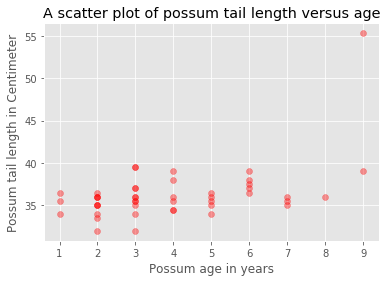

In [3575]:
#Changing the plot style to ggplot.
plt.style.use('ggplot')  

#Creating a scatter plot of the possum age and tail length columns 
fig, ax = plt.subplots()
age_tailL_scatter_plot = ax.scatter(
possum_data['age'], #The age of the possum on the x-axis
possum_data['tailL'], #The tail of the possum on the y-axis
c = 'red',           #Changing the color of the dots to red
alpha = 0.4         #Adding alpha to get a better visual of overlapping data points. 
)

#Labelling the x-axis of the plot
ax.set_xlabel("Possum age in years")

#Labelling the y-axis of the plot 
ax.set_ylabel("Possum tail length in Centimeter")

#Adding a title to the plot 
ax.set_title("A scatter plot of possum tail length versus age")


### Question 2:

Recall that the linear model, we obtain predictions by computing 

$$ \mathbf{\hat{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix, $\beta$ are coefficients, and $\mathbf{\hat{y}}$ are fitted/estimates/predicted values. Define a model-prediction function `yhat = linearModelPredict(beta,X)` that takes a parameter vector `beta` and a matrix `X` of inputs, and produces a vector `yhat` containing the predicted (fitted) values that correspond to each row of the input matrix. Assume that `beta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ columns.

Hint: As of Python 3.5, the `@` symbol can be used for matrix multiplication.

In [3557]:
def linearModelPredict(b,X):
    
    #Changing the shape of X and b for matrix multiplication.  
    X = X.reshape(-1,1)
    b = b.reshape(-1,1)
    
    #Adding ones as the first columns of the matrix X
    X = np.insert(X,0,1,axis=1)
    
    #Matrix multiplication
    yb = X @ b

    return yb 

### Question 3:

Write a function `linearModelLossRSS` which computes the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss. Define a squared error loss function `(loss, gradient) = linearModelLossRSS(beta,X,y)` that takes a parameter vector `beta`, a matrix `X` of inputs, and a vector `y` of observed values, and produces the sum of squared errors between the observed and predicted (fitted) values, along with the gradient of the loss. Assume that `theta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ column, and that `y` has `n` rows and `1` column.

In [3558]:
def linearModelLossRSS(b,X,y):
  
    #Storing predicted y values. 
    predicted_y_values = linearModelPredict(b,X)

    #Changing the shape of predicted_y_values to perform subtraction from y. 
    predicted_y_values = predicted_y_values.reshape(1,-1)
        
    #Computing the residuals 
    residuals = y - predicted_y_values 
    
    #Computing the residuals sum of squares 
    residual_sum_of_squares = np.sum(residuals**2)
    
    #Computing the gradient 
    #First we will make a few changes to the shape of X, y and b 
    X = X.reshape(-1,1)
    b = b.reshape(-1,1)
    y = y.reshape(-1,1)
    X = np.insert(X,0,1,axis=1)

    #Now we will compute the jacobian/gradient.
    gradient = (-2)*(X.T @ y) + 2*(X.T) @ X @ b
    
    #Changing the storage format of the gradient 
    gradient = np.concatenate(gradient)
    
    return (residual_sum_of_squares, gradient) 

### Question 4: 

#### Part 1

Now that you've implemented a loss function in question 3, it is now time to minimize it to fit the data!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument an 2d-array `X` which houses the input data with one example per row, as its second argument a 1d-array `y` of outcomes with one example per row, and as its third argument a function `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss.

Use this function to estimate the parameters that describe the relationship between a possum's age and its tail length, i.e., $\widehat{\mathit{TailLength}} = \beta_0 + \beta_1 \mathit{age}$.

In [3559]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS): 
    
    #Starting values
    bstart = np.array([[0,0]])
    
    #Computing the result
    Result = so.minimize(linearModelLossRSS, bstart, args =(X,y), jac=True)
    
    return Result

In [3560]:
#First we will extract some data from the data frame possum_data
possum_age = np.array([possum_data['age']])
possum_tail_length = np.array([possum_data['tailL']])

#Using the function linearModelFit to estimate the parameters
parameters = linearModelFit(possum_age,possum_tail_length).x

#Computing the predicted possum tail length
predicted_tail_length = linearModelPredict(parameters,possum_age)

#Changing the format of predicted_tial_length to be able to plot it
predicted_tail_length = np.concatenate(predicted_tail_length)
predicted_tail_length = list(predicted_tail_length)

#Changing the format of possum_age to be able to plot it 
possum_age = np.concatenate(possum_age)
possum_age = list(possum_age)

#### Part 2

Using your solution, plot the data points and the fitted line below. Label your plot and your axes.

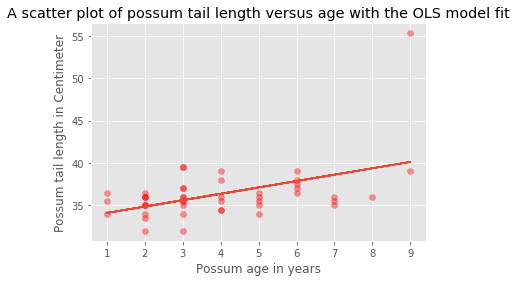

In [3587]:
#Creating a scatter plot of the possum age and tail length columns 
fig, ax = plt.subplots()
age_tailL_scatter_plot = ax.scatter(
possum_data['age'], #The age of the possum on the x-axis.
possum_data['tailL'], #The tail length of the possum on the y-axis. 
c = 'red',           #Changing the color of the dots to red.
alpha = 0.4         #Adding alpha to get a better visual of overlapping data points. 
)

#Labelling the x-axis of the plot
ax.set_xlabel("Possum age in years")

#Labelling the y-axis of the plot 
ax.set_ylabel("Possum tail length in Centimeter")

#Adding a title for the plot 
ax.set_title("A scatter plot of possum tail length versus age with the OLS model fit")

#Plotting the fitted line of possum_age and predicted_tail_length from the OLS estimation. 
ax.plot(possum_age,predicted_tail_length)

# Task 2: Least Absolute Deviation Loss


### Question 1: 

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument a 2d-array `X` of data, and as its third argument a 1d-array `y` of observed outcomes.


In [3588]:
def linearModelLossLAD(b,X,y):  
    
    #Storing predicted y values. 
    predicted_y_values = linearModelPredict(b,X)

    #Changing the shape of predicted_y_values to perform subtraction from y. 
    predicted_y_values = predicted_y_values.reshape(1,-1)
        
    #Computing the sum of least absolute deviations
    abs_dev = y - predicted_y_values 
    sum_abs_dev = np.sum(np.absolute(abs_dev))
    
    #Computing the gradient 
    #First we will make a few changes to the shape of X, y and b 
    X = X.reshape(-1,1)
    b = b.reshape(-1,1)
    y = y.reshape(-1,1)
    X = np.insert(X,0,1,axis=1)

    #Now we will compute the jacobian/gradient.
    grad = (-2)*(X.T @ y) + 2*(X.T) @ X @ b
    
    #Changing the storage format of the gradient 
    grad = np.concatenate(grad)

    return (sum_abs_dev,grad)

### Question 2

Use `linearModelLossLAD` to fit a linear model with least absolute deviation loss.  Report the coefficients of the model, the R squared, and plot the fit.

In [3595]:
def linearModelLADFit(X,y,lossfcn = linearModelLossLAD): 
    
    #Starting values
    bstart = np.array([[0,0]])  
    
    Result = so.minimize(linearModelLossLAD, bstart, args = (X,y), jac=True)
    
    return Result

In [3617]:
#We will use possum_age and predicted_tail_length to report coefficients of the LAD model and the R squared
possum_age_LAD = np.array([possum_data['age']])
possum_tail_length_LAD = np.array([possum_data['tailL']])

#Reporting the coefficients of the LAD model. 
coefficients = linearModelLADFit(possum_age_LAD, possum_tail_length_LAD).x
print("The coefficients of the LAD model are", coefficients)

#Finding the predictions of the possum tail length using the LAD model coefficients 
predicted_tail_length_LAD = linearModelPredict(coefficients,possum_age_LAD)

#Finding R Squared 
residual_for_LAD = predicted_tail_length_LAD - possum_tail_length_LAD
rss_LAD = np.sum(residual_for_LAD**2)
mean_of_tail_length = np.mean(possum_tail_length_LAD)
difference_between_y_and_mean = possum_age_LAD - mean_of_tail_length 
tss_LAD = np.sum(difference_between_y_and_mean**2)
r_squared = 1 - (rss_LAD/tss_LAD)
print ("The value of R Squared is", r_squared)

#Changing the format of predicted_tial_length_lAD to be able to plot it
predicted_tail_length_LAD = np.concatenate(predicted_tail_length_LAD)
predicted_tail_length_LAD = list(predicted_tail_length_LAD)

#Changing the format of possum_age_LAD to be able to plot it 
possum_age_LAD = np.concatenate(possum_age_LAD)
possum_age_LAD = list(possum_age_LAD)

The coefficients of the LAD model are [33.08417435  0.73646195]
The value of R Squared is 0.41964150947571355


Plot the fit below

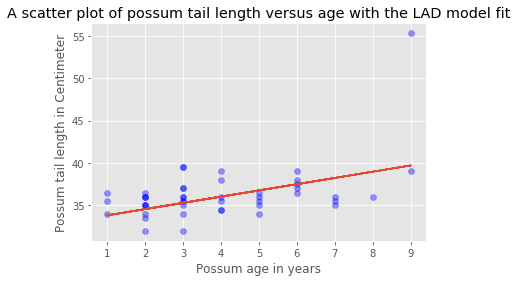

In [3618]:
#Creating a scatter plot of the possum age and tail length columns 
fig, ax = plt.subplots()
age_tailL_scatter_plot = ax.scatter(
possum_data['age'], #The age of the possum on the x-axis
possum_data['tailL'], #The tail length of the possum on the y-axis 
c = 'blue',           #Changing the color of the dots to red
alpha = 0.4         #Adding alpha to get a better visual of overlapping data points. 
)

#Labelling the x-axis of the plot
ax.set_xlabel("Possum age in years")

#Labelling the y-axis of the plot 
ax.set_ylabel("Possum tail length in Centimeter")

#Adding a title for the plot 
ax.set_title("A scatter plot of possum tail length versus age with the LAD model fit")

#Plotting the fitted line of possum age and predicted tail length from the OLS estimation. 
ax.plot(possum_age_LAD,predicted_tail_length_LAD)

# Task 3: Comparing With `Statsmodels`


Fit both an OLS and a LAD model with `statsmodels`. Compare coefficient estimates, R squared values, and plot the fits. Discuss any differences or similarities between your implementation and `statsmodels`, and discuss any differences between the OLS model and the LAD model.

In [3626]:
#Fitting the OLS model
OLS_model = sm.OLS(possum_data['tailL'],possum_data['age']).fit()

#Getting the predicted values of the OLS model
predicted_values_of_OLS_model = OLS_model.predict()

#Fitting the LAD model, using the quantile regression since the LAD model is special case of the quantile regression 
#in statsmodels when q=0.5 according to the documentation
LAD_model = smf.quantreg('tailL ~ age', possum_data).fit(q=0.5)

#Getting the predicted values of the LAD model
predicted_values_of_LAD_model = LAD_model.predict()

#Printing models summary
LAD_model.summary()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  tailL   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              198.1
Date:                Tue, 17 Sep 2019   Prob (F-statistic):                    4.27e-18
Time:                        10:57:15   Log-Likelihood:                         -191.92
No. Observations:                  46   AIC:                                      385.8
Df Residuals:                      45   BIC:                                      387.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            7.3801      0.524     14.076      0.000       6.324       8.436
==============================================================================
Omnibus:                        3.422   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                3.226
Skew:                          -0.597   Prob(JB):                        0.199
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

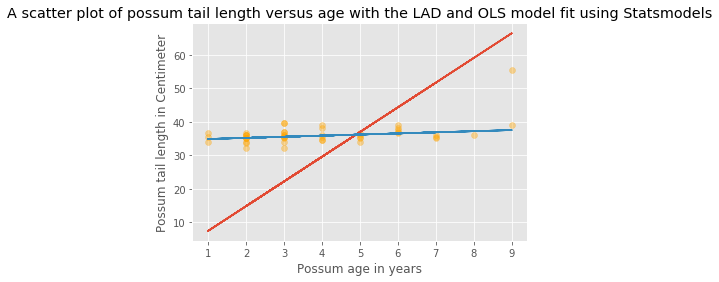

In [3628]:
#Plotting 

#Creating a scatter plot of the possum age and tail length columns 
fig, ax = plt.subplots()
age_tailL_scatter_plot = ax.scatter(
possum_data['age'], #The age of the possum on the x-axis
possum_data['tailL'], #The tail length of the possum on the y-axis 
c = 'orange',           #Changing the color of the dots to red
alpha = 0.4         #Adding alpha to get a better visual of overlapping data points
)

#Labelling the x-axis of the plot
ax.set_xlabel("Possum age in years")

#Labelling the y-axis of the plot 
ax.set_ylabel("Possum tail length in Centimeter")

#Adding a title for the plot 
ax.set_title("A scatter plot of possum tail length versus age with the LAD and OLS model fit using Statsmodels")

#Plotting the OLS fit line 
ax.plot(possum_data['age'],predicted_values_of_OLS_model)

#Plotting the LAD fit line
ax.plot(possum_data['age'],predicted_values_of_LAD_model)

In [ ]:
Discuss differences below.

As shown in the graph above the OLS model fit line is much steeper than the LAD model fit line. This is because the fit line of the ordinary least square is more affected by the outliers in the dataset. The least absolute deviation makes better estimates when there are outliers in the data. The ordinary least square method estimates get strongly affected by outliers leading the model to give predictions that are not as accurate as what the least deviation model would give. 

In the end, It all comes down to the set of data and the problem we are trying to solve. If a given data set contains outliers but they don't need to be given greater weight than the other data points, then the least absolute deviation model will work best for this scenario. On the other hand, if it is important to give greater weight to the outliers in the dataset, then the ordinary least square method will work better.  

The graph and statistics show that my implementation of the LAD model is pretty close to the implementation of the LAD model in the statsmodels package. However, my implementation of the ordinary least square model is off from the implementation of that model in statsmodels. For some reason, my implementation of the ordinary least square model is not as heavily by the outliers in the datasets comparing to the implementation of statsmodels. Since the ordinary least square model should be affected heavily by the outliers in the dataset, I am examining why my implementation was not as heavily affected as the implementation of statsmodels. So far I have tested all the components of all the functions and done some calculations manually to compare what each component of the functions returns. All components are adding up correctly so far, so I am assuming it probably have to do with the shaping of the matrices and the reshaping processes that I did in some of the functions.